Fundamentals of Data Analysis Project 2020

Student : Michelle Moran 

Task details : 


Perform and explain simple linear regression using Python on the powerproduction dataset

Goal : Accurately predict wind turbine output from wind speed values using the data set as a basis.
Using GIT repository  for the submission including the following items : 

1. Jupyter notebook that performs simple linear regression on the data set
2. An explanation of your regression and an analysis of the accuracy
3. Standard items in a git repository such as a README
4. Compare a simple linear regression to other types of regression on this data set


<br>

The Powerproduction Dataset 

.........


### 1.Introduction  $^{1}$

For this project , We will start/ use a simple linear regression to determine whether it can fit the particular type of curve in the dataset. 
Simple linear regression is a statistical model that allows us to summarize and study relationships between 2 continuous variables. In our dataset case the powerproduction of wine turbines,  the variables are wind speed and the turbine power output.

#### Variables defined :

X variable is wind speed and this can be regarded as the predictor or independent variable
Y variable is the response or dependent variable and here it represents the power output of the turbine.

The image below depicts simple linear regression and shows the equation of the line


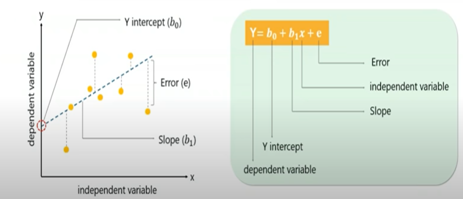

####  4 Assumptions of linear regression $^{2}$: 

1. Linear Relationship : 

Is there a linear relationship between the independent variable x, and the dependent variable , y ? 

In order to determine this we create a scatter plot of x vs y. So for the dataset powerproduction , we created a scatter plot between the wind speed and power. We see that the points on the plot do not fall on a straight line which indicates that it is not a linear relationship but that there is a relationship between the two variables. 

There are two options here  : 

   -  To apply a nonlinear transformation to the independent and/or dependent variables. examples include taking the log or squareroot of either variable
     - Add another independent variable to the model
 
 
2. Independence$^{13}$

Are the residuals independent? 

When a simple linear regression is done, you get a line of best fit. The points dont fall exactly on the regression line , they are scatter about. A residual is the difference between the observed value and the mean value that the model predicts for that observation , negative if its below , positive if above and it zero residual if its on the line itself. Residuals are sometimes referred to as errors , which is an unexplained difference between the datapoint and the line. 

 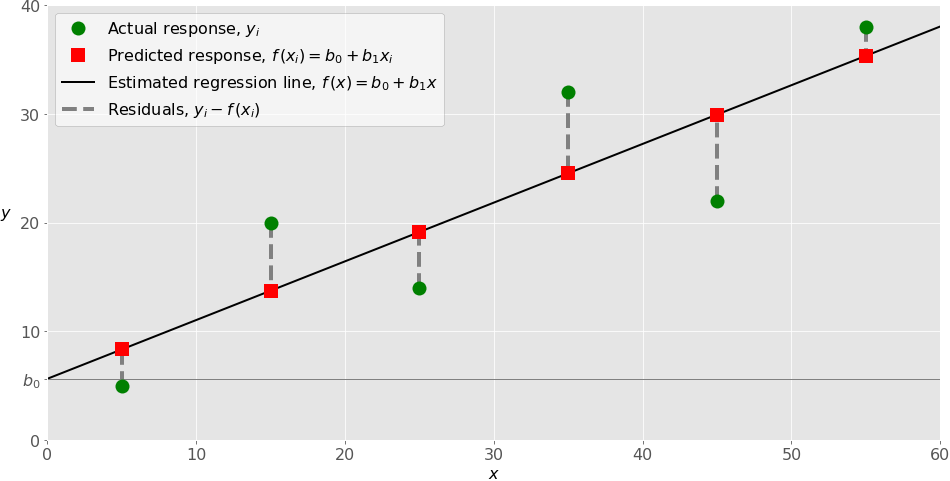

3. Homoscedasticity

Do the residuals have a constant variance at every level of x ? The opposite case to this is called heteroscedastivity and the results of the analysis become hard to trust, as it increases the variance of the regression coefficient estimates.
To detect this , a fitted value vs, residual plot is create. If you see a cone shape in the results were the residuals spread out as the fitted value increases . To overcome this : 

 - Transform the dependent variable : taking the log of the dependent variable for example
 - Redefine the dependent variable
 - use a weighted regression
 
 4. Normality
 
 Are the residuals normally distributed ?
 
 This can be checked using Q-Q plots or using formal statiscal tests like Shapiro-Wilk ( sensitive to larger sample sizes).

#### 4 steps to build a Simple Linear Regression Model $^{3}$: 

Step 1. Importing the dataset

Step 2. Data Pre-processing

Step 3. Visualize the data

Step 4. Fitting a best fit line to the dataset dfpower

#### Step 1 Importing the PowerProduction Dataset 

Import the pandas library - this provides a easy to use data structures and data analysis tools

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
dfpower[0:6]

#dfpower.shape
dfpower.describe


<bound method NDFrame.describe of       speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]>

#### Step 2  Data Checking and  pre-processing


**Data Checking 

Check that the dataset imported correctly by looking at the Head and Tail values. Also using the describe() to have an overview of the statistics of the dataset.

In [5]:
#First 6 entries of the dataset powerproduction
dfpower.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
# Last 6 entries of the dataset powerproduction
dfpower.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
# Statistic review of the dataset powerproduction
dfpower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


**Data Processing $^{4}$

This is not necessary for this dataset - However we did examine the data to see if there was any outliers using scipy-stats .Using Z- scores and interquartile range methods to check if outliers are present.

Using both methods resulted in the same conclusion , there was no outliers present to remove from the data as the shape returned ( 500,2) for all.


In [19]:
import scipy.stats as stats

#find absolute value of z-score for each observation
z = np.abs(stats.zscore(dfpower))


#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = dfpower[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(500, 2)

In [9]:
#find Q1, Q3, and interquartile range for each column
Q1 = dfpower.quantile(q=.25)
Q3 = dfpower.quantile(q=.75)
IQR = dfpower.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = dfpower[~((dfpower < (Q1-1.5*IQR)) | (dfpower > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(500, 2)

#### Step 3  Visualising the dataset $^{5}$

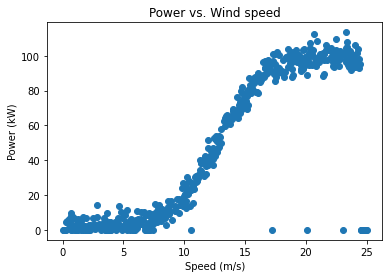

In [10]:
import matplotlib.pyplot as plt

plt.scatter(dfpower.speed, dfpower.power)
plt.title('Power vs. Wind speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Power (kW)')
plt.show()

plt.style.use("ggplot")

# Bigger plots.
plt.rcParams["figure.figsize"] = (18,10)



From the scatter plot above , there does not seem to be a classic linear graph but it does demonstrate that there is a relationship between wind speed and power , where the power increases as the windspeed increase, however it is not obviously linear. The first observation would be that the curve is  a sigmoid curve, shaped. Next is to try and best fit a line to the data points. 

#### Numpy.polyfit  - Its importance $^{6}$

In calculating the best fit line in this simple linear regression we use numpy.polyfit. It uses ordinary least squares method. 

This method does the following : 

 - It calculates the errors between all the data points and the regression model, where error is the difference between the y value that is estimated and the y value in the dataset
 
  - It squares each of the error values
  - Takes the sum of these values 
  - Find the line where this sum of the squared errors is the smallest possible value



#### Calculate the Coefficients of the line (m and c)$^{7}$

The equation of a line for linear regression is  y = mx + c, where x is the WindSpeed ( independent Variable), and y = power ( dependent variable). m is the slope and c is the intercept. 

In [21]:
import numpy as np

#Converting df columns into np arrays for x and y
x=np.array(dfpower.speed)
y=np.array(dfpower.power)

print(type(x))
print(type(y))

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
x= dfpower.speed
y=dfpower.power

m = np.polyfit(x, y, 1)[0]
c = np.polyfit(x,y, 1)[1]
print(f'm(slope): {m:.3f}    c(intercept): {c:.3f}')#round the m and c values to 3 decimal places 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
m(slope): 4.918    c(intercept): -13.900


#### Step 4 Plotting the line : best fit $^{8}$,$^{9}$

Using the values of m and c

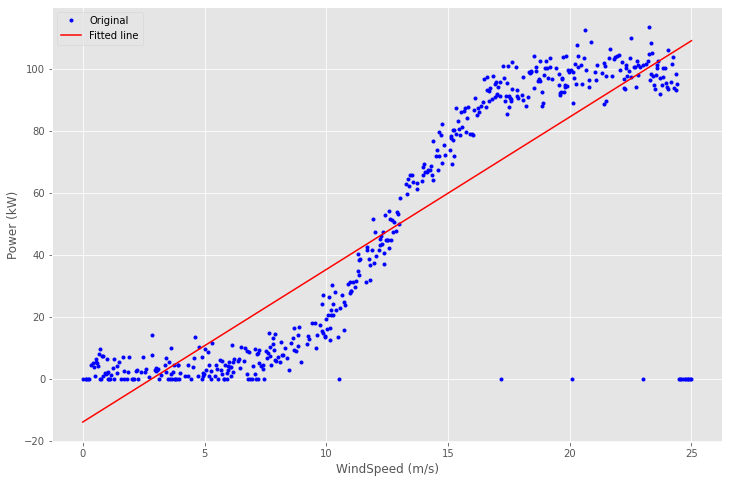

In [16]:
# Plot the best fit line.
plt.figure(figsize=(12,8))

x= dfpower.speed
y=dfpower.power

plt.plot(x, y, '.b', label='Original')
plt.plot(x, m * x + c, 'r-', label='Fitted line')

# Add axis labels and a legend.
plt.xlabel('WindSpeed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()

# Show the plot.
plt.show();

**Correlation coefficients : $^{9}$

R-squared calculates how similar a regression line is to the data it’s fitted to.

These quantify the relationships between the variables of the dataset. Results below are positive and close to 1. This indicates a positive relationship between the variables, that is when one variable increases so will the other.

There are three examples of correlation coefficients : 

   - Pearson’s r  - measures linear correlation between 2 variables, value of +1 ( total positive linear )and -1 ( total   negative linear) and 0- no correlation.
 - Spearman’s rho - measures monotonic relationships ( whether linear or not). Compares the ranks of data 
 - Kendall’s tau - measures the ordinal association between two measured quantities.Compares the ranks of data

Using SciPys statistics routine to calculate these three coeefficient versions :  


In [23]:
import scipy.stats
scipy.stats.pearsonr(x, y) # Pearson's r

(0.8537775037188595, 2.8596889641534797e-143)

In [24]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.8187276026588616, pvalue=4.4287029757150813e-122)

In [25]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.7275042154337987, pvalue=1.630169049999099e-129)

In [ ]:
The R value results for all three examples are postive correlation indicating that as x windspeed increases so does y power.  

**Simple Linear Regression conclusions :$^{15}$ 

The graph above shows us that there is very little power output when the speed is less than 10 meters per second and after 17 meters per second you are not generating any extra power. One would think the faster the wind turbine the more power you would generate but this is not the case. The most power generated is between the speeds of 10 and less than 20 meters per second. 

The curve looks more like a sigmoid curve ( s-shaped curve) rather than an obvious straight line. However the R2 values are all close to one.  

**Advanced statistical parameters and residual plots for a Linear regression model:$^{9}$$^{14}$

This can be achieved using the statsmodel package , it gives you a summary of results for the linear regression using the OlS() function ( ordinary least squares ) and creates residual plots

This is method to check if the linear regression model is accurate and that the best possible estimates can be achieved. 

Residual plots show if the residuals of the linear regression model are normally distributed and are homoscedastic.

Import statsmodels.api as sm
from statsmodels.formula.api import ols

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          2.86e-143
Time:                        18:55:16   Log-Likelihood:                -1371.4
No. Observations:                 500   AIC:                             2747.
Df Residuals:                     498   BIC:                             2755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4732      0.257     21.275      0.0

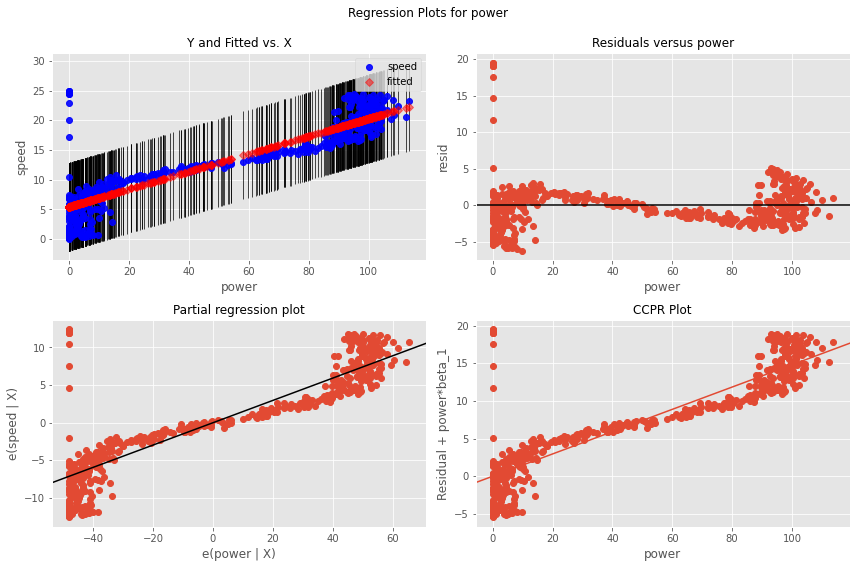

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power


#fit simple linear regression model
model = ols('speed ~ power', data=dfpower).fit()

#view model summary
print(model.summary())

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'power', fig=fig)


In [ ]:
Conclusion to OLS summary and plots : 
   
From the summary above , we can determine that : 
    
power (y) = 5.473 +0.1482*(speed) which can be used in prediction.
r2 value is 0.729  which is in line with the value achieved in above linear regression coefficent calculations. 

Four residual plots are produced. 
The plot of residual vs power shows that there is pattern , that it is not Homoscedasticity but heteroscedastivity. This is 
one of the assumptions of linear regression. Inorder to correct this  we could add in another independent variable or look at
polynomial regression or an interaction term. 


#### Other Regressions and methods : $^{10}$,$^{11}$.$^{12}$

The above scatter plot shows that the relationship between the variables are not a simple linear one . 
Other types of regressions are polynomial and logisical .

NB: We look at the method of R-squared value to calculate the accuracy of the model used. This value is a number between 0 and 1. , and the closer you are to 1 , the more accurate the linear regression model is. 


Below we examine another example of regression : Polynomial. There is various degrees of polynomial , starting at 1 which is your simple linear regression. Its important to note that as the degrees increases , the model gets increasing more complicated. This could lead to overfitting of the data or underfitting too. 

1. Polynomial Regression 

Using NumPy Polyfit() Method to fit our data inside a polynomial function. It least squares the polynomial fit. It fits a polynomial p(x) of degree deg to points(x,y). This method returns a vector of coefficients p that minimises the squared error in the order of deg, deg-1, ... 0.

The equation for Polynomial is : 



The syntax:

numpy.polyfit (X, Y, deg, rcond=None, full=False, w=None, cov=False)

###### Calculating value of coefficients in case of linear polynomial - 2 constants

1. z = np.polyfit(x, y, 1) # the last argument is the degree of polynomial


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
import sklearn.model_selection as mod
import numpy as np

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
dfpower[0:6]
x = dfpower.speed
y = dfpower.power
# calculating value of coefficients in case of linear polynomial - 2 constants
z = np.polyfit(x, y, 1) # the last argument is the degree of polynomial
#A one-dimensional polynomial class function created
poly1d_fn = np.poly1d(z)
print("\ncoefficient value in case of linear polynomial:\n", z)

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

#calculating the accuracy of the linear polynomial model using r2 values

predict=np.poly1d(z)
from sklearn.metrics import r2_score
r2_score(y, predict(x))

######Calculating value of coefficients in case of Cubic polynomial - 3 constants

z = np.polyfit(x,y,2)


In [ ]:

x = dfpower.speed
y = dfpower.power

z = np.polyfit(x,y,2)
poly1d_fn = np.poly1d(z) 
print(poly1d_fn)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
print("\ncoefficient value in case of linear polynomial:\n", z)

#calculating the accuracy of the cubic polynomial model using r2 values
predict=np.poly1d(z)
from sklearn.metrics import  r2_score
r2_score(y, predict(x))



#### Calculating value of coefficient in case of quadratic polynomial - 4 constants

z = np.polyfit(x,y,3)

In [ ]:
import numpy as np
z = np.polyfit(x,y,4)
poly1d_fn = np.poly1d(z) 
print(poly1d_fn)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
print("\ncoefficient value in case of quadratic polynomial:\n", z)    
#calculating the accuracy of the quadratic polynomial model using r2 values
predict=np.poly1d(z)
from sklearn.metrics import r2_score
r2_score(y, predict(x))


#### Comparison of the different degrees of polynomial regression : 

**linear polynomial - 2 constants

 Coefficient value in case of linear polynomial:[  4.91759567 -13.89990263]
    r2 :0.7289360258564073 

**Cubic polynomial - 3 constants
          
coefficient value in case of linear polynomial:[ -0.07021949   6.67418543 -21.22684391]
    r2: 0.7351940425885428
    
**Quadratic polynomial - 4 constants
        
coefficient value in case of quadratic polynomial: [ -0.05241927   1.89485751 -12.94285866  19.20130246]
    r2:0.8796883953739737


From the r values above , the best fit line looks like the Quadratic polynomial - Degree of 4. Most of the data points are on the line. As defined above R-squared calculates how similar a regression line is to the data it’s fitted to. 

#### Comparison of Linear Regression and Polynomial Regression  $^{11}$,$^{15}$$^{16}$

To compare power output predictions using both Linear regression and Polynomial Regressions using SKlearn


In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt


#import dataset
dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power

#reshape() is used to convert from 1-D to 2-D
#x = x.values.reshape(-1, 1)
#y = y.values.reshape(-1, 1)

#Converting df columns into np arrays for x and y
x=np.array(dfpower.speed).reshape(-1, 1)
y=np.array(dfpower.power).reshape(-1, 1)

#fitting the linear regression model to the dfpower through polynomial features in sklearn

poly_reg = PolynomialFeatures(degree=1) # Degree 1 is a simple linear regression
x_poly = poly_reg.fit_transform(x) # transforming the x variables data to polynomial features
pol_reg = linear_model.LinearRegression(fit_intercept=False) # choosing the polynomial regression model
pol_reg.fit(x_poly, y)
print('Coefficients = ', lin_reg.coef_)
y_pred = pol_reg.predict(poly_reg.fit_transform(x))
r2 = r2_score(y,y_pred)
print('Coefficient of determination: %.2f'% r2)
print('Mean squared error: %.2f'
      % mean_squared_error(y,y_pred))


# visualising the linear regression model
plt.scatter(x,y, color='red')
plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)),color='blue')
plt.title("Windspeed vs Power (Linear)")
plt.xlabel('speed')
plt.ylabel('power')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#Converting df columns into np arrays for x and y
x=np.array(dfpower.speed).reshape(-1, 1)
y=np.array(dfpower.power).reshape(-1, 1)

poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x) 

pol_reg = linear_model.LinearRegression(fit_intercept=False)
pol_reg.fit(x_poly, y)
print('Coefficients = ', pol_reg.coef_)
y_pred = pol_reg.predict(poly_reg.fit_transform(x))
r2 = r2_score(y,y_pred)
print('Coefficient of determination: %.2f'% r2)
print('Mean squared error: %.2f'
      % mean_squared_error(y,y_pred)) 
    
# Visualising the regression results( for higher resolution and smoother curve)
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1) 
plt.scatter(x,y, color='red') # original values
 
plt.plot(x_grid, pol_reg.predict(poly_reg.fit_transform(x_grid)),color='blue') # using the original x values and the predicted y values ( from the transformed x values)
 
plt.title("Windspeed vs Power (Polynomial)")
plt.xlabel('speed')
plt.ylabel('power')
plt.show()

In [ ]:
#predictions : 
lin_reg.predict([[15]])

In [ ]:
lin_reg2.predict( poly_reg.fit_transform([[15]]))

Conclusions: I feel the prediction value calculated from the polynomial fit is most accurate calculation of power out at windspeed of 15. As the r2 value for polynomial was closer to 1, meaning the line was a better fit. However both the prediction values for linear and polynomial regressions are close , as are the r2 values. Perhaps there is another better regression type more suitable to this type of dataset and curve. This curve is a sigmoid curve, a logistics regression maybe more suitable. 

References : 




References :

[1]https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,as%20dependent%20and%20independent%20variables).

[2] https://www.statology.org/linear-regression-assumptions/

[3] https://realpython.com/linear-regression-in-python/

[4] https://www.statology.org/remove-outliers-python/

[5] https://learnonline.gmit.ie/course/view.php?id=1120#section-10 - Topic 4 Datasets - Plotting the equation . Ian Mcloughlin

[6] https://data36.com/linear-regression-in-python-numpy-polyfit/

[7] https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

[8] https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python

[9] https://realpython.com/numpy-scipy-pandas-correlation-python/

[10] https://appdividend.com/2020/06/03/numpy-polyfit-method-in-python/#:~:text=Numpy%20polyfit%20%28%29%20method%20is%20used%20to%20fit,error%20in%20the%20order%20deg%2C%20deg-1%2C%20%E2%80%A6.%200.

[11] https://www.askpython.com/python/examples/polynomial-regression-in-python#:~:text=%20A%20Simple%20Example%20of%20Polynomial%20Regression%20in,are%20using%20this%20to%20compare%20the...%20More%20

[12] https://iq.opengenus.org/polynomial-regression-using-scikit-learn/

[13] http://wiki.engageeducation.org.au/further-maths/data-analysis/residuals/ - image reference

[14] https://www.statology.org/residual-plot-python/

[15] https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit#:~:text=R%2Dsquared%20is%20a%20statistical,multiple%20determination%20for%20multiple%20regression.&text=100%25%20indicates%20that%20the%20model,response%20data%20around%20its%20mean

[16] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html